In [245]:
import numpy as np
import numpy.linalg as lg
import matplotlib.pyplot as plt

In [246]:
N = 4
n = 53
np.set_printoptions(precision=8)

In [247]:
def f(tau):
    return (20 + 0.2 * N) / (1 + (20 + 0.2 * N) * (1 + 0.05 * (54 - n)) * (tau - 1) ** 2)

In [248]:
a = 0
b = 2
k = 11
k2 = 22
A = np.linspace(a, b, k)
B = np.linspace(a, b, k2)
print(A)
print(B)

[0.  0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2. ]
[0.         0.0952381  0.19047619 0.28571429 0.38095238 0.47619048
 0.57142857 0.66666667 0.76190476 0.85714286 0.95238095 1.04761905
 1.14285714 1.23809524 1.33333333 1.42857143 1.52380952 1.61904762
 1.71428571 1.80952381 1.9047619  2.        ]


In [249]:
SLAE = []
y = []
for i in A:
    tau0 = 1
    row = []
    for j in A:
        row.append(tau0)
        tau0 *= i
    SLAE.append(row)
    y.append(f(i))
SLAE = np.array(SLAE)
y = np.array(y)
#print("f(tau):", y)
print("Полученная СЛАУ:", SLAE)
print("f(tau):", y)

Полученная СЛАУ: [[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 2.00000000e-01 4.00000000e-02 8.00000000e-03
  1.60000000e-03 3.20000000e-04 6.40000000e-05 1.28000000e-05
  2.56000000e-06 5.12000000e-07 1.02400000e-07]
 [1.00000000e+00 4.00000000e-01 1.60000000e-01 6.40000000e-02
  2.56000000e-02 1.02400000e-02 4.09600000e-03 1.63840000e-03
  6.55360000e-04 2.62144000e-04 1.04857600e-04]
 [1.00000000e+00 6.00000000e-01 3.60000000e-01 2.16000000e-01
  1.29600000e-01 7.77600000e-02 4.66560000e-02 2.79936000e-02
  1.67961600e-02 1.00776960e-02 6.04661760e-03]
 [1.00000000e+00 8.00000000e-01 6.40000000e-01 5.12000000e-01
  4.09600000e-01 3.27680000e-01 2.62144000e-01 2.09715200e-01
  1.67772160e-01 1.34217728e-01 1.07374182e-01]
 [1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00

In [250]:
x_coefs = lg.solve(SLAE, y)
print(x_coefs)

[ 9.10683012e-01  1.44023463e+03 -1.97515114e+04  1.08307018e+05
 -3.17075721e+05  5.53315827e+05 -6.02641698e+05  4.13077809e+05
 -1.73088072e+05  4.04844488e+04 -4.04844488e+03]


## Проверим интерполяционный полином, сравнивая вычисленные значения на сетке

Lk(tau0) = 0.9106830122591942
f(tau0) = 0.9106830122591942
Lk(tau1) = 1.3887405201258274
f(tau1) = 1.3887405191753015
Lk(tau2) = 2.346994038936153
f(tau2) = 2.3469940422458926
Lk(tau3) = 4.627981493593619
f(tau3) = 4.627981488074049
Lk(tau4) = 11.101622544589816
f(tau4) = 11.101622544833477
Lk(tau5) = 20.79999999958045
f(tau5) = 20.8
Lk(tau6) = 11.101622547004808
f(tau6) = 11.101622544833466
Lk(tau7) = 4.6279814853623975
f(tau7) = 4.627981488074045
Lk(tau8) = 2.3469940411741845
f(tau8) = 2.3469940422458917
Lk(tau9) = 1.3887405167333782
f(tau9) = 1.3887405191753015
Lk(tau10) = 0.9106830130331218
f(tau10) = 0.9106830122591942


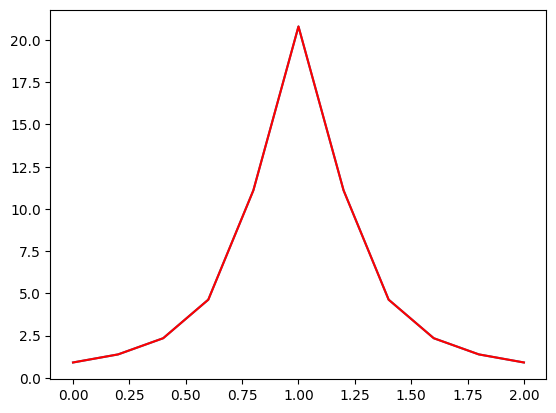

In [251]:
y = []
real_y = []
for i, tau in enumerate(A):
    tau_1 = 1
    summa = 0
    for j in range(len(A)):
        summa += x_coefs[j] * tau_1
        tau_1 *= tau
    print(f"Lk(tau{i}) = {summa}")
    print(f"f(tau{i}) = {f(tau)}")
    y.append(summa)
    real_y.append(f(tau))
plt.plot(A, y)
plt.plot(A, real_y, color="red")
plt.show()

Lk(tau0) = 0.9106830122591942
f(tau0) = 0.9106830122591942
Lk(tau1) = 30.311515484237912
f(tau1) = 1.101806074059126
Lk(tau2) = 3.1579825944543813
f(tau2) = 1.3583779076999627
Lk(tau3) = -4.1286268382330595
f(tau3) = 1.7129411764705882
Lk(tau4) = 1.2010671652401523
f(tau4) = 2.2199634071965844
Lk(tau5) = 5.08743497827413
f(tau5) = 2.9746663034595473
Lk(tau6) = 4.874484718842641
f(tau6) = 4.150513112884834
Lk(tau7) = 4.903789184627158
f(tau7) = 6.070038910505835
Lk(tau8) = 8.649165291472912
f(tau8) = 9.293617021276594
Lk(tau9) = 15.090918958360362
f(tau9) = 14.387351778656122
Lk(tau10) = 20.077307218225087
f(tau10) = 19.818511796733212
Lk(tau11) = 20.077307219911745
f(tau11) = 19.818511796733222
Lk(tau12) = 15.09091896182872
f(tau12) = 14.38735177865613
Lk(tau13) = 8.649165292801626
f(tau13) = 9.293617021276594
Lk(tau14) = 4.903789180680178
f(tau14) = 6.070038910505838
Lk(tau15) = 4.874484709958779
f(tau15) = 4.150513112884837
Lk(tau16) = 5.087434972228948
f(tau16) = 2.9746663034595486


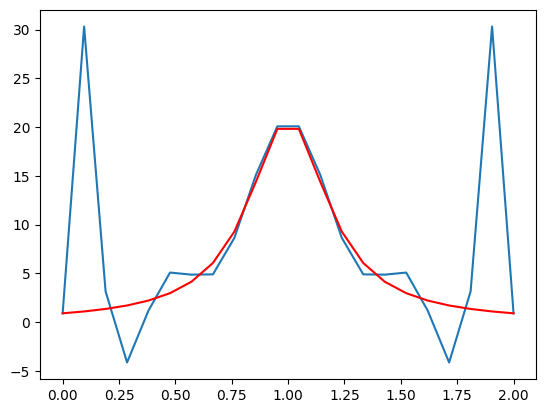

In [252]:
y = []
real_y = []
for i, tau in enumerate(B):
    tau_1 = 1
    summa = 0
    for j in range(len(A)):
        summa += x_coefs[j] * tau_1
        tau_1 *= tau
    print(f"Lk(tau{i}) = {summa}")
    print(f"f(tau{i}) = {f(tau)}")
    y.append(summa)
    real_y.append(f(tau))
plt.plot(B, y)
plt.plot(B, real_y, color="red")
plt.show()

## Вычисление коэффициентов полинома Лаггранжа на чебышёвской схеме сеток

In [253]:
a = 0
b = 2
k = 11
k2 = 22
A2 = []
B2 = []
for i in range(k):
    A2.append((a+b)/2 - (b-a)/2*np.cos((2*i + 1)*np.pi / 2 / (k + 1)))
for i in range(k2):
    B2.append((a+b)/2 - (b-a)/2*np.cos((2*i + 1)*np.pi / 2 / (k2 + 1)))
A2 = np.array(A2)
B2 = np.array(B2)
print(A2)
print(B2)

[0.00855514 0.07612047 0.20664666 0.39123857 0.61731657 0.86947381
 1.13052619 1.38268343 1.60876143 1.79335334 1.92387953]
[0.00233123 0.02091591 0.05773908 0.11211478 0.18303011 0.26916404
 0.36891206 0.48041605 0.60159891 0.73020323 0.86383335 1.
 1.13616665 1.26979677 1.39840109 1.51958395 1.63108794 1.73083596
 1.81696989 1.88788522 1.94226092 1.97908409]


In [254]:
SLAE = []
y = []
for i in A2:
    tau0 = 1
    row = []
    for j in A2:
        row.append(tau0)
        tau0 *= i
    SLAE.append(row)
    y.append(f(i))
SLAE = np.array(SLAE)
y = np.array(y)
#print("f(tau):", y)
print("Полученная СЛАУ:", SLAE)
print("f(tau):", y)

Полученная СЛАУ: [[1.00000000e+00 8.55513863e-03 7.31903969e-05 6.26153992e-07
  5.35683420e-09 4.58284592e-11 3.92068821e-13 3.35420312e-15
  2.86956726e-17 2.45495457e-19 2.10024767e-21]
 [1.00000000e+00 7.61204675e-02 5.79432557e-03 4.41066771e-04
  3.35742088e-05 2.55568447e-06 1.94539897e-07 1.48084679e-08
  1.12722750e-09 8.58050841e-11 6.53152311e-12]
 [1.00000000e+00 2.06646660e-01 4.27028420e-02 8.82439965e-03
  1.82353271e-03 3.76826944e-04 7.78700292e-05 1.60915814e-05
  3.32527155e-06 6.87156259e-07 1.41998546e-07]
 [1.00000000e+00 3.91238571e-01 1.53067619e-01 5.98859567e-02
  2.34296961e-02 9.16660083e-03 3.58632781e-03 1.40310977e-03
  5.48950660e-04 2.14770672e-04 8.40265707e-05]
 [1.00000000e+00 6.17316568e-01 3.81079745e-01 2.35246840e-01
  1.45221772e-01 8.96478057e-02 5.53410757e-02 3.41629629e-02
  2.10893630e-02 1.30188132e-02 8.03672907e-03]
 [1.00000000e+00 8.69473808e-01 7.55984702e-01 6.57308898e-01
  5.71512870e-01 4.96915472e-01 4.32054987e-01 3.75660495e-01

In [255]:
x_coefs = lg.solve(SLAE, y)
print(x_coefs)

[ 7.69128401e-01  2.18547715e+01 -4.44755064e+02  3.66281454e+03
 -1.44315194e+04  3.10825951e+04 -3.88772230e+04  2.89940174e+04
 -1.27195870e+04  3.03177829e+03 -3.03177829e+02]


## Проверим полученный полином Лагранжа, вычисляя значения на сетке

Lk(tau0) = 0.9257647898107333
f(tau0) = 0.9257647898107333
Lk(tau1) = 1.058976539112662
f(tau1) = 1.0589765392127923
Lk(tau2) = 1.4105229375537396
f(tau2) = 1.4105229377315045
Lk(tau3) = 2.287298798434647
f(tau3) = 2.287298798766084
Lk(tau4) = 4.954275431987206
f(tau4) = 4.954275432575835
Lk(tau5) = 15.159355690638947
f(tau5) = 15.159355690826963
Lk(tau6) = 15.159355690633902
f(tau6) = 15.15935569082697
Lk(tau7) = 4.954275432256509
f(tau7) = 4.954275432575838
Lk(tau8) = 2.2872987990194815
f(tau8) = 2.287298798766084
Lk(tau9) = 1.4105229376582429
f(tau9) = 1.4105229377315052
Lk(tau10) = 1.0589765391487163
f(tau10) = 1.0589765392127923


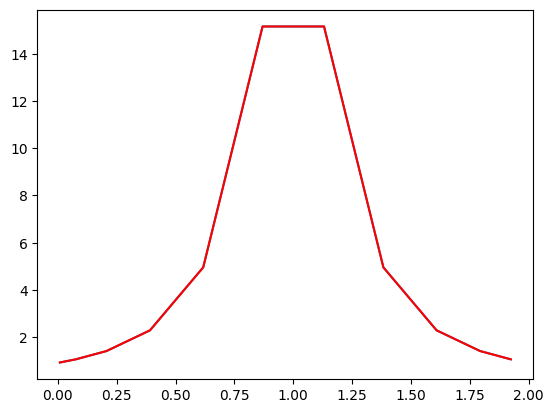

In [256]:
y = []
real_y = []
for i, tau in enumerate(A2):
    tau_1 = 1
    summa = 0
    for j in range(len(A2)):
        summa += x_coefs[j] * tau_1
        tau_1 *= tau
    print(f"Lk(tau{i}) = {summa}")
    print(f"f(tau{i}) = {f(tau)}")
    y.append(summa)
    real_y.append(f(tau))
plt.plot(A2, y)
plt.plot(A2, real_y, color="red")
plt.show()

Lk(tau0) = 0.8177058171603468
f(tau0) = 0.9147565412580891
Lk(tau1) = 1.0625462128665255
f(tau1) = 0.9482152563971149
Lk(tau2) = 1.1115064499337284
f(tau2) = 1.0200695098716697
Lk(tau3) = 0.9901314539969902
f(tau3) = 1.14176875383178
Lk(tau4) = 1.2398216912788558
f(tau4) = 1.3353118747898
Lk(tau5) = 1.8764353616841136
f(tau5) = 1.6422944960300732
Lk(tau6) = 2.256353300464352
f(tau6) = 2.14471454428252
Lk(tau7) = 2.564755624429696
f(tau7) = 3.016202027454364
Lk(tau8) = 4.509597255572279
f(tau8) = 4.656869667791085
Lk(tau9) = 9.268495304580345
f(tau9) = 8.031693983927836
Lk(tau10) = 14.96191071215064
f(tau10) = 14.8048687462198
Lk(tau11) = 17.566892683981507
f(tau11) = 20.8
Lk(tau12) = 14.961910712131157
f(tau12) = 14.804868746219785
Lk(tau13) = 9.268495304685075
f(tau13) = 8.031693983927845
Lk(tau14) = 4.509597255888366
f(tau14) = 4.656869667791085
Lk(tau15) = 2.564755624945974
f(tau15) = 3.016202027454366
Lk(tau16) = 2.2563533010761603
f(tau16) = 2.1447145442825195
Lk(tau17) = 1.876435

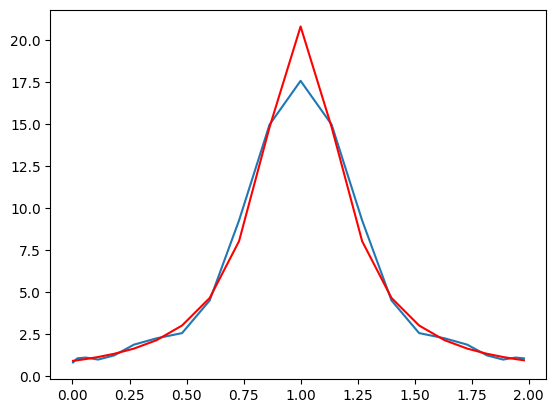

In [257]:
y = []
real_y = []
for i, tau in enumerate(B2):
    tau_1 = 1
    summa = 0
    for j in range(len(A2)):
        summa += x_coefs[j] * tau_1
        tau_1 *= tau
    print(f"Lk(tau{i}) = {summa}")
    print(f"f(tau{i}) = {f(tau)}")
    y.append(summa)
    real_y.append(f(tau))
plt.plot(B2, y)
plt.plot(B2, real_y, color="red")
plt.show()